# Working with sidewall angles

## Introduction


This notebook uses PreFab to **predict** and **correct** the fabrication result of a 400 nm-wide ring nanostructure on a **silicon nitride (SiN)** e-beam lithography process that has angled sidewalls. This tutorial is structured as follows:

1. Preparing a test device for prediction
2. Executing a prediction
3. Analyzing the prediction and uncertainty
4. Correcting the device and discussion of sidewall angles

To begin, we need to import the necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import prefab as pf

## Loading a device


In this tutorial, we'll use a small ring structure, but feel free to explore other structures available in the `shapes.py` module, or load your own from a GDS file.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

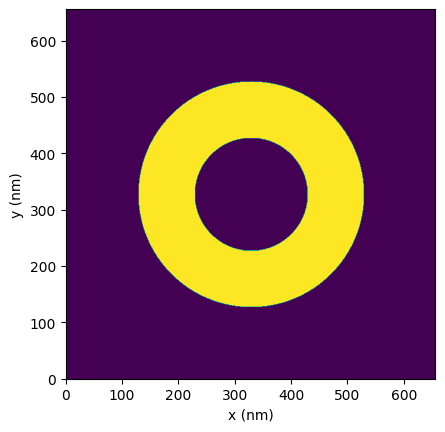

In [34]:
device = pf.shapes.ring(width=400, border_width=100)
device.plot(show_buffer=False)

## Predicting a device


The prediction process is similar to previous notebook examples, but we'll use a model trained on SiN structures with angled sidewalls. This model outputs three segments: core (yellow), sidewall of the core (green), and cladding (purple), unlike the previous examples' models which had only core and cladding (indicating a vertical sidewall).

> **Note:** Initial prediction/correction may take longer due to server startup and model loading. Subsequent predictions should be quicker.


Prediction: 100%|██████████████████████████████| 100/100 [00:06<00:00, 16.13%/s]


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

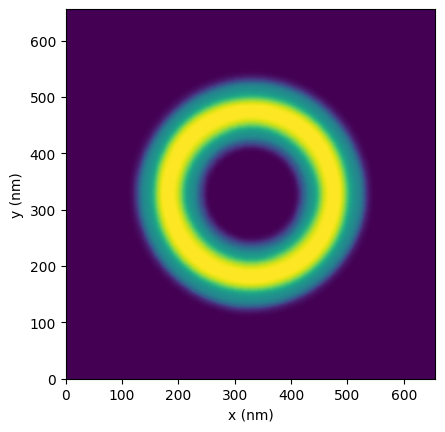

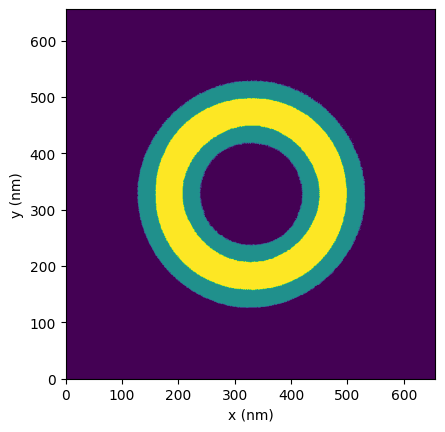

In [35]:
MODEL_NAME = "ANT_SiN_ANF1_d1"
prediction = device.predict(model=pf.models[MODEL_NAME])
prediction_bin = prediction.binarize()

prediction.plot(show_buffer=False)
prediction_bin.plot(show_buffer=False)

The model outputs an NxMx2 array, where the third dimension represents the top and bottom edges of the structure. We can visualize these edges separately using the `level` parameter.

<Axes: xlabel='x (nm)', ylabel='y (nm)'>

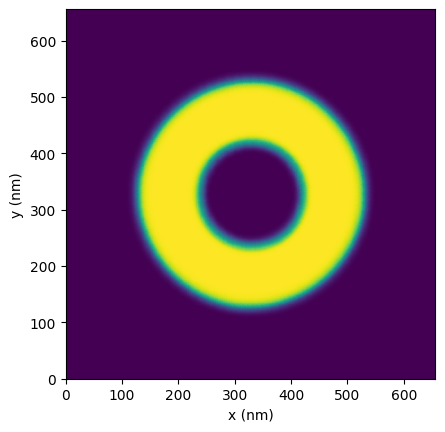

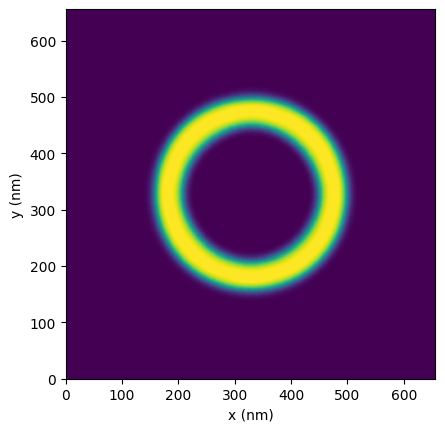

In [13]:
prediction.plot(level=0, show_buffer=False)
prediction.plot(level=1, show_buffer=False)


## Analyzing a prediction


We can overlay the contour of the nominal device on the prediction to visualize the differences between the nominal and predicted geometries. This comparison reveals significant erosion at the top level or edge, and shows that the outer sidewall is wider than the inner sidewall, indicating a non-uniform, feature-dependent sidewall angle.

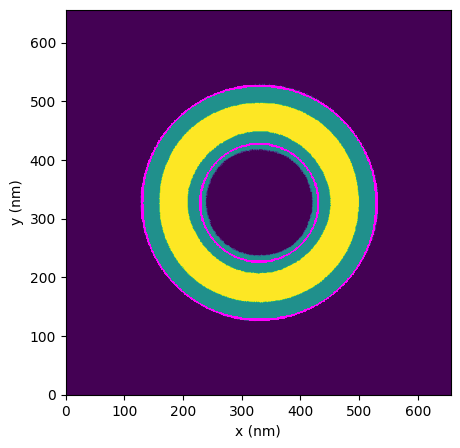

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
prediction_bin.plot(show_buffer=False, ax=ax)
device.plot_contour(show_buffer=False, ax=ax)
plt.show()

Likewise, each edge carries its own level of uncertainty. We are still investigating the relationship between edge uncertainty and sidewall angle, and how they vary from device to device and fabrication run to run. The less these uncertainties overlap with the optical signal, the more robust the device will be to fabrication variations.

<Axes: xlabel='x (nm)', ylabel='y (nm)'>

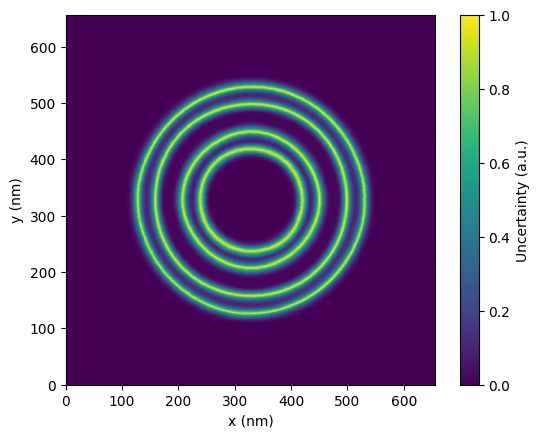

In [37]:
prediction.plot_uncertainty(show_buffer=False)

## Correction

The sidewall angle is a result of the etching process and cannot be corrected through lithography adjustments. However, we can *compensate* for the sidewall angle by ensuring the half-width of the sidewall region matches the nominal width. By overlaying the contour of the nominal device on the corrected outcome, we can see that the corrector model has successfully compensated for the sidewall angle.

This method helps maintain a consistent effective volume and index profile, minimizing performance degradation. Research is ongoing to verify different sidewall-angle compensation strategies. Other factors to consider include the height of the core region and the linearity of the sidewall.

Prediction: 100%|██████████████████████████████| 100/100 [00:02<00:00, 39.85%/s]


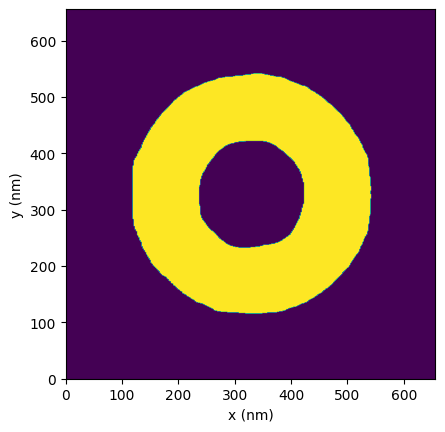

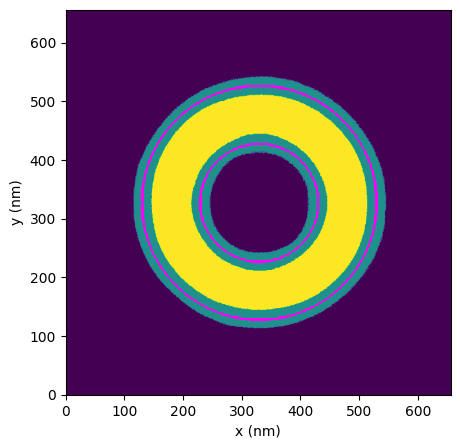

In [39]:
MODEL_NAME = "ANT_SiN_ANF1_d1"
correction = device.correct(model=pf.models[MODEL_NAME])
outcome = correction.predict(model=pf.models[MODEL_NAME])
outcome_bin = outcome.binarize()

correction.plot(show_buffer=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
outcome_bin.plot(show_buffer=False, ax=ax)
device.plot_contour(show_buffer=False, ax=ax)
plt.show()

Feel free to try different structures and settings to see how they affect your designs. Thanks for following along!